In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [99]:
# Specify the path to the Excel file in your Downloads folder
file_path = 'C:\\Users\\seanm\\Downloads\\adult-all.csv'

In [101]:
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [103]:
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [105]:
# Assuming your existing DataFrame is named 'df' and the column names are in a list named 'column_names'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Salary']

In [107]:
# Assign the column names to the DataFrame
df.columns = column_names

In [109]:
# Create a new DataFrame with a single row containing the column names
column_names_df = pd.DataFrame([column_names], columns=column_names)

In [111]:
# Concatenate the column names row with the original DataFrame
final_df = pd.concat([column_names_df, df], ignore_index=True)

In [113]:
# Display the final DataFrame
print(final_df)

       age         workclass  fnlwgt  education  education-num  \
0      age         workclass  fnlwgt  education  education-num   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64                 ?  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0          marital-status         occupation    relationship   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [115]:
final_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [117]:
# Remove the first row
final_df = final_df.drop(0).reset_index(drop=True)

# Display the DataFrame after removing the first row
print("\nDataFrame after removing the first row:")
print(final_df)


DataFrame after removing the first row:
      age         workclass  fnlwgt  education education-num  \
0      50  Self-emp-not-inc   83311  Bachelors            13   
1      38           Private  215646    HS-grad             9   
2      53           Private  234721       11th             7   
3      28           Private  338409  Bachelors            13   
4      37           Private  284582    Masters            14   
...    ..               ...     ...        ...           ...   
48836  39           Private  215419  Bachelors            13   
48837  64                 ?  321403    HS-grad             9   
48838  38           Private  374983  Bachelors            13   
48839  44           Private   83891  Bachelors            13   
48840  35      Self-emp-inc  182148  Bachelors            13   

           marital-status         occupation    relationship  \
0      Married-civ-spouse    Exec-managerial         Husband   
1                Divorced  Handlers-cleaners   Not-in-family  

In [119]:
final_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [121]:
# Display basic information about the dataset
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  object
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  object
 3   education       48841 non-null  object
 4   education-num   48841 non-null  object
 5   marital-status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  object
 11  capital-loss    48841 non-null  object
 12  hours-per-week  48841 non-null  object
 13  native-country  48841 non-null  object
 14  Salary          48841 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB
None


In [123]:
print(final_df.describe())

          age workclass  fnlwgt education  education-num      marital-status  \
count   48841     48841   48841     48841          48841               48841   
unique     74         9   28522        16             16                   7   
top        36   Private  203488   HS-grad              9  Married-civ-spouse   
freq     1348     33906      21     15784          15784               22379   

            occupation relationship   race    sex  capital-gain  capital-loss  \
count            48841        48841  48841  48841         48841         48841   
unique              15            6      5      2           123            99   
top     Prof-specialty      Husband  White   Male             0             0   
freq              6172        19716  41761  32649         44807         46559   

        hours-per-week native-country Salary  
count            48841          48841  48841  
unique              96             42      2  
top                 40  United-States  <=50K  
freq 

In [125]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df), columns=final_df.columns)

In [127]:
# Convert numeric columns to appropriate data types
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
final_df_imputed[numeric_columns] = final_df_imputed[numeric_columns].apply(pd.to_numeric)

In [129]:
# Separate features and target
X = final_df_imputed.drop(columns=['Salary'])  # 'Salary' is the target variable
y = final_df_imputed['Salary']

In [131]:
# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [133]:
# Identify categorical columns with a reasonable number of unique values
max_categories = 50
categorical_columns = [col for col in X.select_dtypes(include=['object']).columns if X[col].nunique() <= max_categories]
high_cardinality_columns = [col for col in X.select_dtypes(include=['object']).columns if X[col].nunique() > max_categories]

In [137]:
# One-hot encode low cardinality categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(X[categorical_columns])
encoded_categorical_final_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))

In [139]:
# Label encode high cardinality categorical columns
for col in high_cardinality_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [141]:
# Drop original categorical columns and concatenate the new encoded columns
X = X.drop(columns=categorical_columns)
X = pd.concat([X, encoded_categorical_final_df], axis=1)

In [143]:
# Check that all columns are numeric
print(X.dtypes)

age                                 int64
fnlwgt                              int64
education-num                       int64
capital-gain                        int64
capital-loss                        int64
                                   ...   
native-country_Thailand           float64
native-country_Trinadad&Tobago    float64
native-country_United-States      float64
native-country_Vietnam            float64
native-country_Yugoslavia         float64
Length: 100, dtype: object


In [145]:
# Ensure the data is not empty
if not X.empty:
    # Standardize/Normalize the data
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    print(X_scaled.head())
else:
    print("DataFrame is empty after cleaning.")

        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.828300 -1.007127       1.136539     -0.144799     -0.217129   
1 -0.046940  0.246012      -0.419313     -0.144799     -0.217129   
2  1.047111  0.426642      -1.197239     -0.144799     -0.217129   
3 -0.776308  1.408510       1.136539     -0.144799     -0.217129   
4 -0.119877  0.898798       1.525502     -0.144799     -0.217129   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0       -2.213010              -0.173797            -0.261943   
1       -0.034087              -0.173797            -0.261943   
2       -0.034087              -0.173797            -0.261943   
3       -0.034087              -0.173797            -0.261943   
4       -0.034087              -0.173797            -0.261943   

   workclass_Never-worked  workclass_Private  ...  native-country_Portugal  \
0                -0.01431          -1.506731  ...                -0.037063   
1                -0.01431           0.663689

In [155]:
#Problem 2: Build a K-Nearest Neighbors Model
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [157]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [159]:
# Determine the best value of K using GridSearchCV
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)})

In [161]:
# Print the best value of K
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of K: {best_k}")

Best value of K: 16


In [163]:
# Build the KNN model with the best value of K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [165]:
# Predict the test set results
y_pred = knn.predict(X_test)

In [167]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8328385709898659
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7464
           1       0.69      0.52      0.59      2305

    accuracy                           0.83      9769
   macro avg       0.78      0.72      0.74      9769
weighted avg       0.82      0.83      0.82      9769

Confusion Matrix:
[[6937  527]
 [1106 1199]]


In [169]:
#Creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [171]:
#Pairplot to visualize relationships between numerical features
# Select a subset of numerical columns for visualization
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [173]:
# Combine the standardized numerical columns with the target variable 'Salary'
df_visualize = pd.concat([X_scaled[numerical_columns], pd.Series(y, name='Salary')], axis=1)

C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

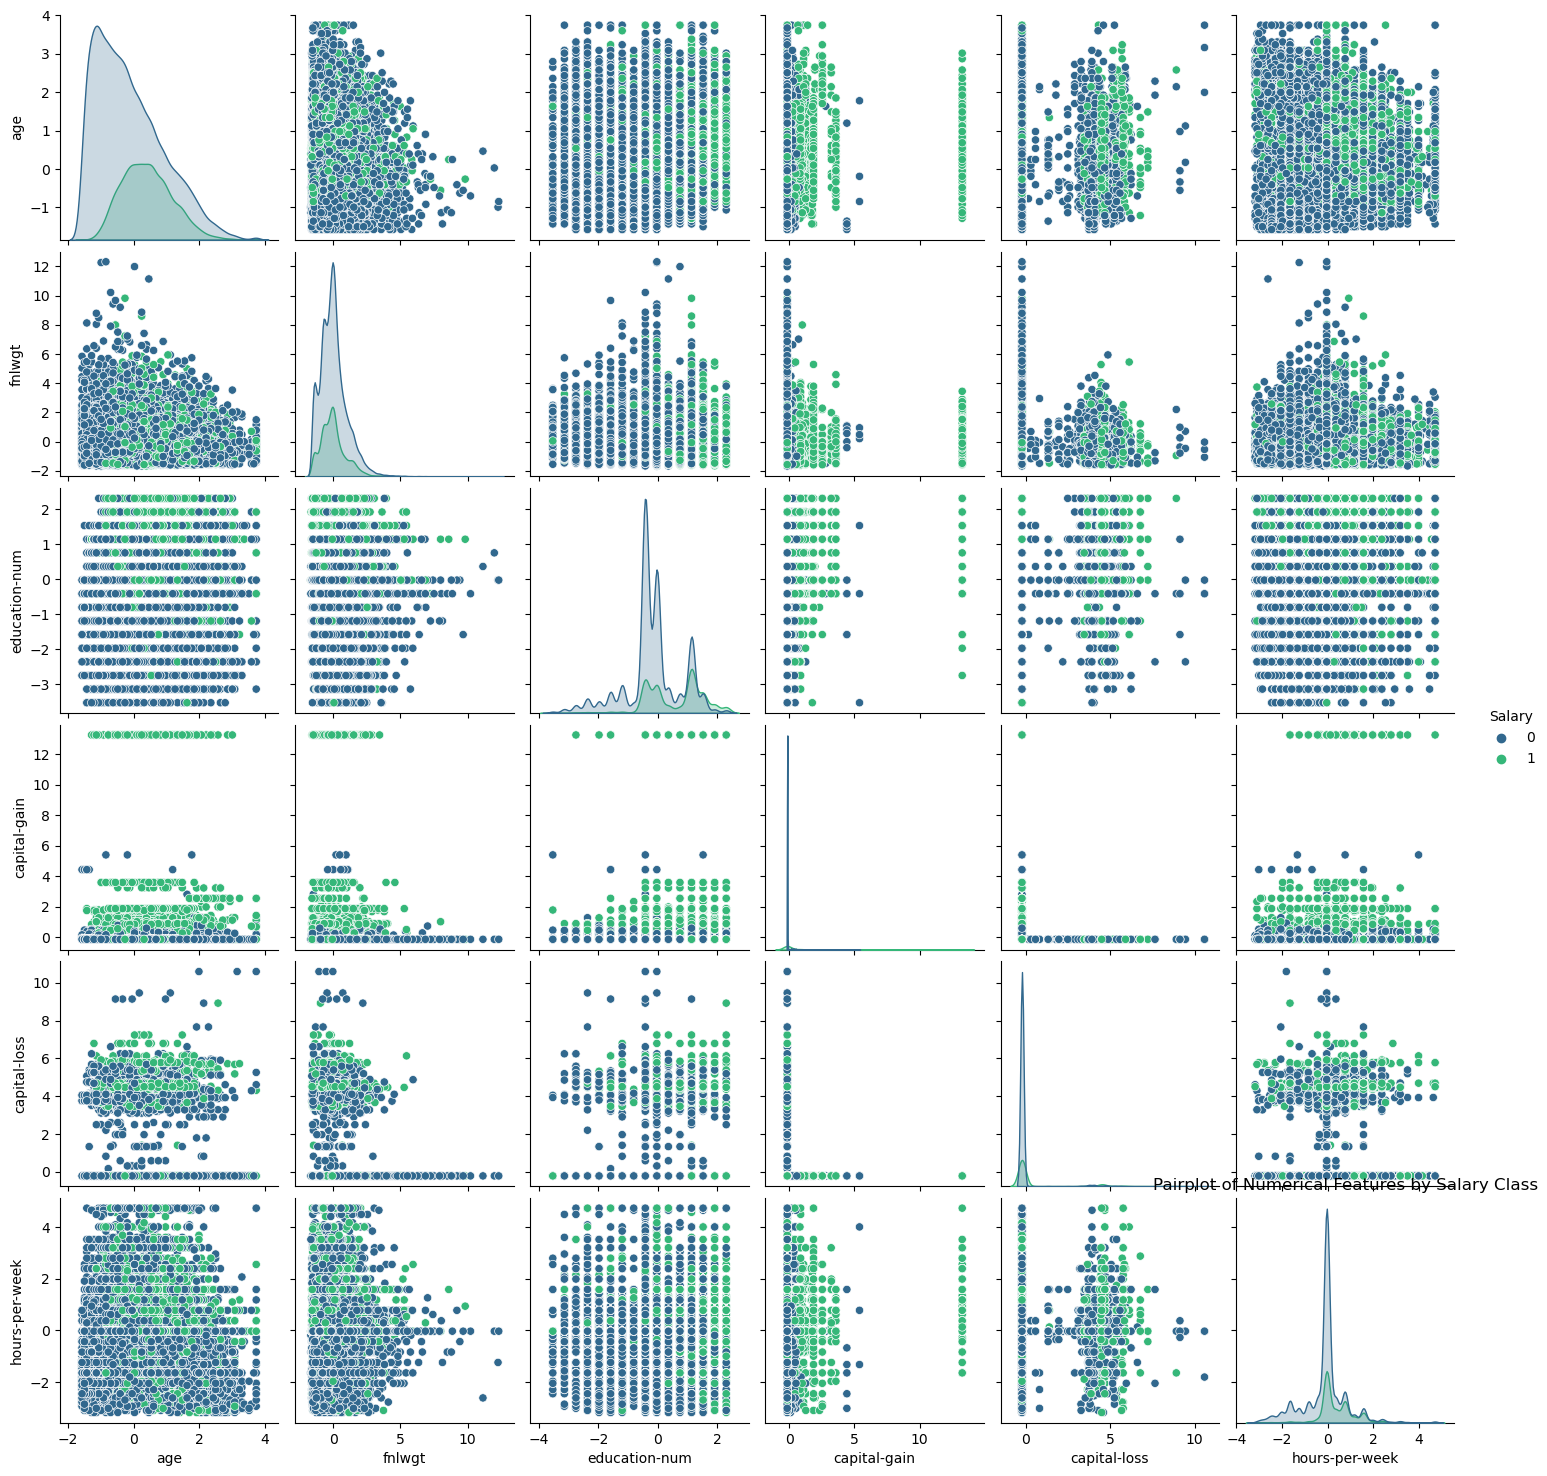

In [175]:
# Create pairplot
sns.pairplot(df_visualize, hue='Salary', palette='viridis')
plt.title('Pairplot of Numerical Features by Salary Class')
plt.show()

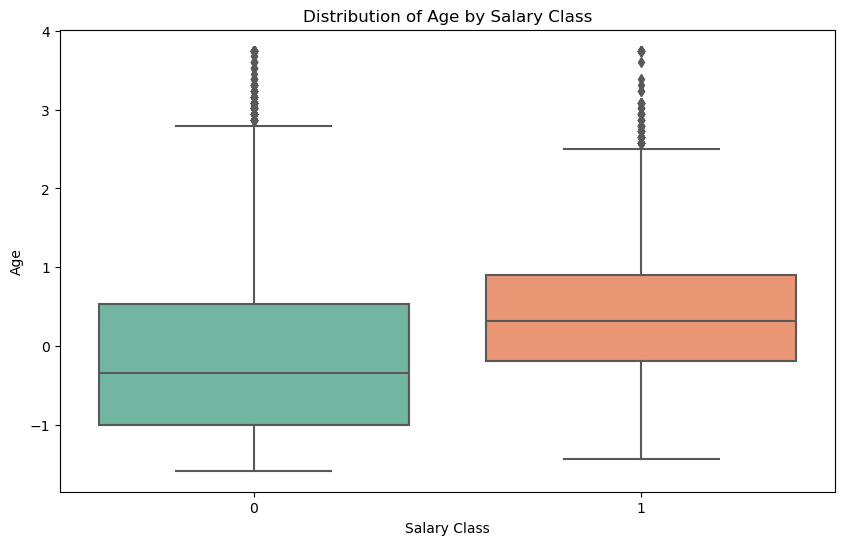

In [185]:
#Boxplot to visualize distributions of numerical features by Salary class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', y='age', data=df_visualize, palette='Set2')
plt.title('Distribution of Age by Salary Class')
plt.xlabel('Salary Class')
plt.ylabel('Age')
plt.show()

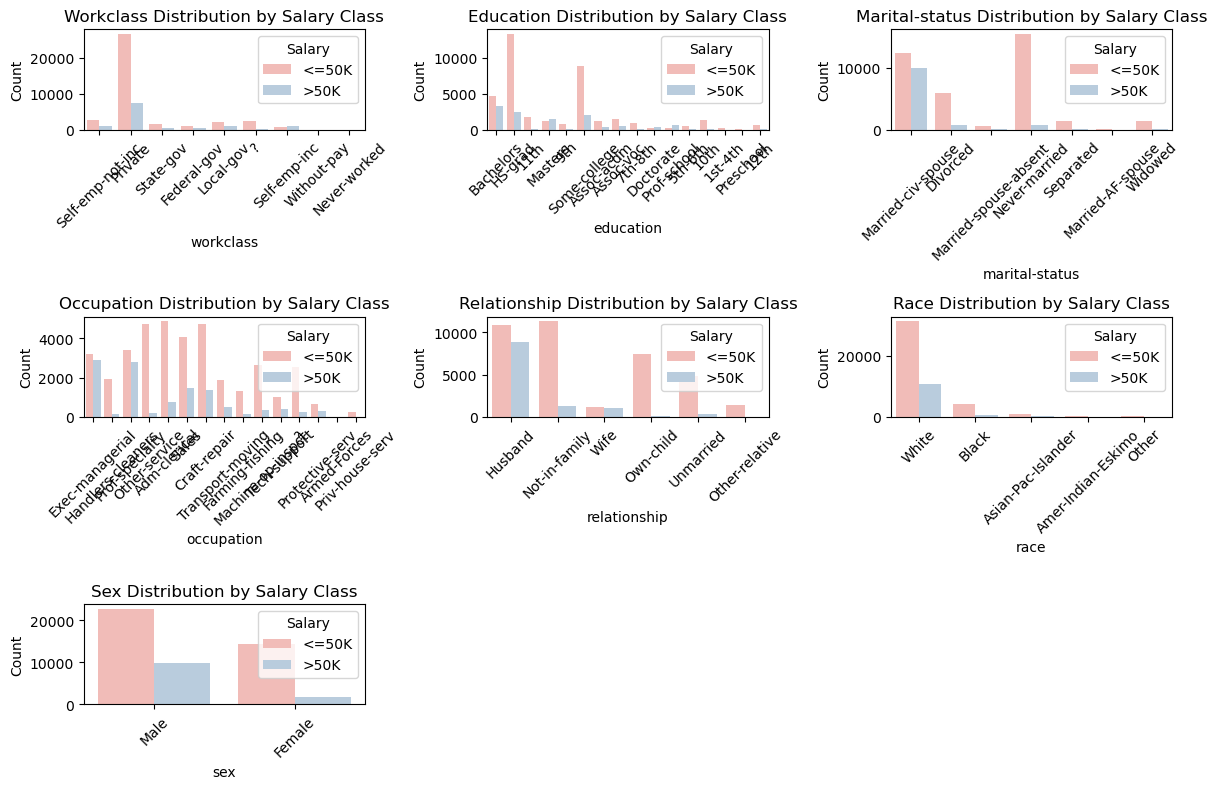

In [181]:
#Countplot to visualize categorical feature distributions by Salary class
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Salary', data=final_df_imputed, palette='Pastel1')
    plt.xticks(rotation=45)
    plt.title(f'{col.capitalize()} Distribution by Salary Class')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()